<a href="https://colab.research.google.com/github/ThuanPhong0126/PaternRecognize-project-cs338/blob/main/TFIDF_QuestionSimilarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/MyDrive/[]Nhan Dang/Question-Similarity

/content/gdrive/MyDrive/[]Nhan Dang/Question-Similarity


In [ ]:
import pandas as pd

In [ ]:
ensemble_train = pd.read_csv("/content/gdrive/MyDrive/[]Nhan Dang/Question-Similarity/SBERT_encode_sentence.csv")

In [ ]:
ensemble_dev = pd.read_csv("/content/gdrive/MyDrive/[]Nhan Dang/Question-Similarity/SBERT_encode_sentence_dev.csv")
ensemble_test = pd.read_csv("/content/gdrive/MyDrive/[]Nhan Dang/Question-Similarity/SBERT_encode_sentence_test.csv")

In [ ]:
train = pd.read_csv("/content/gdrive/MyDrive/[]Nhan Dang/Question-Similarity/Quora dataset/train.csv")
train['question1'] = train['question1'].apply(lambda x: str(x))
train['question2'] = train['question2'].apply(lambda x: str(x))
train

,id,qid1,qid2,question1,question2,is_duplicate
0,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
1,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
2,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
3,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
4,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
...,...,...,...,...,...,...
244285,404284,537926,537927,What does Jainism say about homosexuality?,What does Jainism say about Gays and Homosexua...,1
244286,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
244287,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
244288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [ ]:
dev = pd.read_csv("/content/gdrive/MyDrive/[]Nhan Dang/Question-Similarity/Quora dataset/dev.csv")
dev['question1'] = dev['question1'].apply(lambda x: str(x))
dev['question2'] = dev['question2'].apply(lambda x: str(x))
dev

,id,qid1,qid2,question1,question2,is_duplicate
0,340617,468377,468378,How do you know if a lightning strikes your ho...,How often does lightning strike the Eiffel Tower?,0
1,89072,149711,149712,Are facials good or bad for your skin?,Are back facials good for your skin?,0
2,270535,388449,140381,What are Bust Rhymes fastest raps?,What does RAP mean?,0
3,66193,114771,114772,What's the funniest conversation you've overhe...,What is the funniest conversation you overheard?,1
4,197370,257850,108173,What is the best book to learn c#?,What are the best books to learn c programing ...,1
...,...,...,...,...,...,...
79995,380953,512628,512629,What should you do if a person whom you love i...,What will be the future of ssc offier in iaf a...,0
79996,296654,418894,418895,Is it possible to flash a custom ROM without r...,How can I run Kali Linux on the Android device...,0
79997,203503,306150,306151,The education system is outdated. What would y...,If you had the power to make one change in pub...,0
79998,365150,495250,495251,How does the sound quality differ when listeni...,Would playing a vintage mono record on a stere...,0


In [ ]:
test = pd.read_csv("/content/gdrive/MyDrive/[]Nhan Dang/Question-Similarity/Quora dataset/test.csv")
test

,id,qid1,qid2,question1,question2,is_duplicate
0,96431,160631,17921,What's the best time to visit Bermuda?,What are some of the most amazing places to vi...,0
1,112142,183533,183534,Can the value of oil ETF USO can go to zero?,I started programming 4 years ago. But recentl...,0
2,264650,336711,381462,Can I charge my phone with a charger that outp...,Can I charge my phone with a charger that outp...,1
3,209773,314137,314138,What if Gohan entered the Hyperbolic Time Cham...,What if Gohan had went in with Goten in the hy...,1
4,65399,113510,113511,What's the difference between Super AMOLED and...,Where can I get a custom AMOLED screen made?,0
...,...,...,...,...,...,...
79995,324578,450698,181669,Which is the best smartphone by look under Rs ...,What's the best stock android smartphone under...,1
79996,93202,155887,155888,I often know exactly what people are going to ...,What are the exact jobs available for mechatro...,0
79997,327117,304782,453505,Is Gary Vaynerchuk worth listening to when his...,What is Rob Gronkowski's net worth? Is it all ...,0
79998,351069,479881,479882,How do you find out if there are free 24 hour ...,What is a good 24-hour legal advice hotline?,0


In [ ]:
corpus = train['question1'].to_list() + train['question2'].to_list()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vect = TfidfVectorizer(min_df=1, stop_words="english")                                                                                                                                                                                                   
vect.fit(corpus)                                                                                                                                                                                                                       

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
corpus_train1 = train['question1'].to_list()
corpus_train2 = train['question2'].to_list()

In [ ]:
tfidf_train1 = vect.transform(corpus_train1)
tfidf_train2 = vect.transform(corpus_train2)
pairwaise_train = tfidf_train1 * tfidf_train2.T

In [ ]:
train_similarity = []
for i, s1 in enumerate(corpus_train1):
  s2 = corpus_train2[i]
  tfidf = vect.transform([s1, s2])
  train_similarity.append((tfidf*tfidf.T).toarray()[0][1])

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

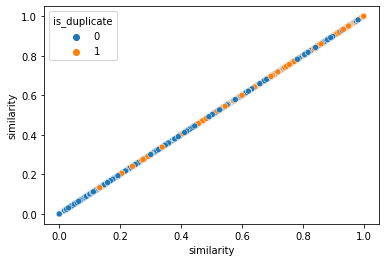

In [ ]:
dev_df = pd.DataFrame(columns=['similarity', 'is_duplicate'])
dev_df['similarity'] = dev_similarity
dev_df['is_duplicate'] = dev['is_duplicate']
sns.scatterplot(data=dev_df, x='similarity', y = 'similarity', hue='is_duplicate')

In [ ]:
ensemble_train['tfidf'] = train_similarity
ensemble_train.to_csv("/content/gdrive/MyDrive/[]Nhan Dang/Question-Similarity/ensemble_train.csv", index=False)

In [ ]:
train = pd.read_csv("/content/gdrive/MyDrive/[]Nhan Dang/Question-Similarity/ensemble_train.csv")
train

,distilbert-base-nli-stsb-quora-ranking,paraphrase-distilroberta-base-v2,paraphrase-mpnet-base-v2,paraphrase-MiniLM-L12-v2,nli-mpnet-base-v2,is_duplicate,paraphrase-TinyBERT-L6-v2,paraphrase-MiniLM-L6-v2,stsb-mpnet-base-v2,distiluse-base-multilingual-cased-v1,stsb-distilroberta-base-v2,nli-roberta-base-v2,stsb-roberta-base-v2,nli-distilroberta-base-v2,distiluse-base-multilingual-cased-v2,average_word_embeddings_komninos,average_word_embeddings_glove.6B.300d,average_word_embeddings_levy_dependency,tfidf
0,0.696001,0.573700,0.569865,0.528683,0.593448,0,0.677278,0.576335,0.726059,0.584884,0.593941,0.588562,0.599323,0.607856,0.610290,0.874871,0.651956,0.818624,0.790132
1,0.644232,0.580639,0.639119,0.665531,0.751989,0,0.586621,0.690827,0.705231,0.794581,0.603158,0.676315,0.562753,0.671447,0.737434,0.847067,0.809579,0.877216,0.274691
2,0.524185,0.329884,0.357737,0.372725,0.381514,0,0.424391,0.375748,0.401750,0.474788,0.397911,0.373088,0.251338,0.409317,0.493282,0.768955,0.676888,0.774744,0.243344
3,0.797487,0.821957,0.829856,0.820814,0.842494,1,0.817135,0.840911,0.829541,0.864448,0.762922,0.806959,0.720074,0.800717,0.892830,0.819618,0.741882,0.874276,0.487620
4,0.405980,0.222970,0.268923,0.360277,0.774101,0,0.167811,0.321182,0.502594,0.712492,0.448202,0.754384,0.560354,0.657452,0.730754,1.000000,1.000000,1.000001,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244285,0.968404,0.924721,0.971645,0.958220,0.975229,1,0.961037,0.956967,0.970600,0.964372,0.863011,0.903813,0.903206,0.898462,0.965878,0.950473,0.927411,0.965316,0.811930
244286,0.567139,0.586432,0.591516,0.550486,0.757204,0,0.686659,0.557353,0.557772,0.854385,0.636474,0.811767,0.604400,0.828141,0.882678,0.946330,0.906133,0.958616,0.693523
244287,0.952039,0.947387,0.922788,0.910906,0.922571,1,0.928489,0.914483,0.924535,0.909789,0.923433,0.938677,0.931787,0.924841,0.887078,0.872990,0.941845,0.847171,0.631680
244288,0.279280,0.014479,0.007940,-0.103434,0.076680,0,-0.016502,-0.132550,0.040603,0.143299,-0.007328,0.065641,0.044847,0.063082,0.081014,0.545603,0.348115,0.621314,0.000000


In [ ]:
u_tmp =0.0
f1_max = 0
while u_tmp<=1.0:
  predict = []
  for s in dev_df['similarity']:
    if s<u_tmp: predict.append(0)
    else: predict.append(1)
  f1_ = f1_score(dev_df['is_duplicate'], predict)
  if f1_>f1_max:
    f1_max = f1_score(dev_df['is_duplicate'], predict)
    acc = accuracy_score(dev_df['is_duplicate'], predict)
    u = u_tmp
  u_tmp += 0.01
print(u)
print(f1_max)
print(acc)

0.36000000000000015
0.6226159011357955
0.603775


In [ ]:
corpus_test1 = test['question1'].apply(lambda x: str(x)).to_list()
corpus_test2 = test['question2'].apply(lambda x: str(x)).to_list()

In [ ]:
test_similarity = []
for i, s1 in enumerate(corpus_test1):
  s2 = corpus_test2[i]
  tfidf = vect.transform([s1, s2])
  test_similarity.append((tfidf*tfidf.T).toarray()[0][1])

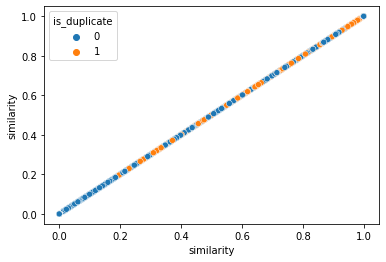

In [ ]:
test_df = pd.DataFrame(columns=['similarity', 'is_duplicate'])
test_df['similarity'] = test_similarity
test_df['is_duplicate'] = test['is_duplicate']
sns.scatterplot(data=test_df, x='similarity', y = 'similarity', hue='is_duplicate')

In [ ]:
predict = []
for s in ensemble_dev['tfidf']:
    if s<0.36: predict.append(0)
    else: predict.append(1)
print(f1_score(dev['is_duplicate'], predict))
print(accuracy_score(dev['is_duplicate'], predict))
print(f1_score(dev['is_duplicate'], predict, average='weighted'))

0.6226159011357955
0.603775
0.5975148610993425


In [ ]:
ensemble_test['tfidf'] = test_similarity
ensemble_test.to_csv("/content/gdrive/MyDrive/[]Nhan Dang/Question-Similarity/ensemble_test.csv", index=False)